Cargar y preprocesar el video:

In [16]:
import cv2 as cv

# Cargar el video
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

# Verificar si el video se cargó correctamente
if not cap.isOpened():
    print("Error al cargar el video")
else:
    print("Video cargado correctamente")

# Obtener la cantidad de frames
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print(f"Total de frames en el video: {frame_count}")


Video cargado correctamente
Total de frames en el video: 171


Implementar la métrica de enfoque:

In [17]:
import numpy as np

def sharpness_metric(image):
    #Convertir la imagen a escala de grises
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    #Aplicar la transformada de fourier
    f_transform = np.fft.fft2(gray_image)

    #Desplazar la componente de frecuencia cero al centro del espectro
    f_transform_shifted = np.fft.fftshift(f_transform)

    #Calcular la magnitud del espectro de fourier
    magnitude_spectrum = np.abs(f_transform_shifted)

    #Definir una máscara para las componentes de alta frecuencia
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols //2
    mask = np.ones((rows,cols), np.uint8)
    r = 30 #radio para las componentes de baja frequencia
    mask[crow - r:crow + r, ccol - r:ccol +r] = 0

    #Aplicar la mascara para eliminar las componentes de baja frecuencia
    high_freq_magnitude = magnitude_spectrum * mask

    #Calcular la métrica de nitidez como la suma de las componentes de alta frecuencia
    sharpness_value = np.sum(high_freq_magnitude)

    return sharpness_value

Medir el enfoque:

In [18]:
sharpness_values = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0) #ir al primer frame

for i in range (frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    sharpness = sharpness_metric(frame)
    sharpness_values.append(sharpness)

    print(f"Frame {i+1}/{frame_count}, Sharpness: {sharpness}")

cap.release()


Frame 1/171, Sharpness: 76553525.42566699
Frame 2/171, Sharpness: 73510467.71906668
Frame 3/171, Sharpness: 76991594.22644158
Frame 4/171, Sharpness: 74459978.11920013
Frame 5/171, Sharpness: 78533027.38527553
Frame 6/171, Sharpness: 76208176.92885141
Frame 7/171, Sharpness: 78847736.79351956
Frame 8/171, Sharpness: 76260025.80883467
Frame 9/171, Sharpness: 79827783.14097469
Frame 10/171, Sharpness: 78797275.25138007
Frame 11/171, Sharpness: 80618465.15631022
Frame 12/171, Sharpness: 77351476.0875999
Frame 13/171, Sharpness: 81109670.98237494
Frame 14/171, Sharpness: 78347372.53676078
Frame 15/171, Sharpness: 81200339.74747765
Frame 16/171, Sharpness: 77708631.97156934
Frame 17/171, Sharpness: 80949320.26021688
Frame 18/171, Sharpness: 78939930.39058857
Frame 19/171, Sharpness: 80848227.08170106
Frame 20/171, Sharpness: 79025005.02436829
Frame 21/171, Sharpness: 81125831.63838424
Frame 22/171, Sharpness: 79796986.15046445
Frame 23/171, Sharpness: 81428514.59828584
Frame 24/171, Sharpne

Visualizar la métrica de enfoque:

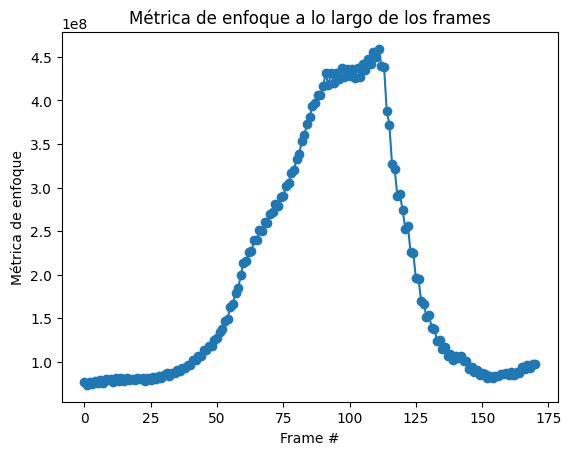

In [19]:
import matplotlib.pyplot as plt

plt.plot(sharpness_values, marker='o')
plt.title('Métrica de enfoque a lo largo de los frames')
plt.xlabel('Frame #')
plt.ylabel('Métrica de enfoque')
plt.show()

Medición de ROI (Región de interés):

In [20]:
#Definir subimagen centrada en el frame

def sharpness_metric_roi(image, roi_size=0.1):
    rows, cols, _ = image.shape
    roi_h, roi_w = int(rows * roi_size), int(cols * roi_size)
    start_row, start_col = (rows - roi_h) // 2, (cols - roi_w) // 2
    roi = image[start_row:start_row+roi_h, start_col:start_col+roi_w]

    return sharpness_metric(roi)

sharpness_values_roi = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0) # Resetear

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    sharpness = sharpness_metric_roi(frame)
    sharpness_values_roi.append(sharpness)

    print(f"Frame {i+1}/{frame_count}, Sharpness (ROI): {sharpness}")

cap.release()

Medir el enfoque utilizando una matriz de NxM regiones:

In [21]:
def sharpness_metric_grid(image, N, M):
    rows, cols, _ = image.shape
    cell_h, cell_w = rows // N, cols // M
    sharpness_total = 0
    
    for i in range(N):
        for j in range(M):
            roi = image[i*cell_h:(i+1)*cell_h, j*cell_w:(j+1)*cell_w]
            sharpness_total += sharpness_metric(roi)
    
    return sharpness_total / (N * M)

sharpness_values_grid = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric_grid(frame, N=3, M=3)  # Probar con diferentes valores de N y M
    sharpness_values_grid.append(sharpness)
    
    print(f"Frame {i+1}/{frame_count}, Sharpness (Grid): {sharpness}")

cap.release()


Visualizar el video:

*Dado que el formato del video no era soportado primero se procedió a realizar una conversión a mp4 con codec H.264, este video ya se cargó formateado por una cuestión de practicidad y será el que se utilizará a continuación

In [35]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mp4'
cap = cv.VideoCapture(video_path)


In [36]:
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    raise ValueError("No se pudo abrir el archivo de video. Verifica la ruta y el formato.")

# Intentar leer el primer frame nuevamente
ret, frame = cap.read()
if not ret:
    raise ValueError("No se pudo leer el primer frame del video. Verifica el archivo de video.")


In [37]:
rows, cols = 5,5

# Definir la ROI en el centro del frame
roi_percentage = 0.1  # Porcentaje del área total del frame que ocupará la ROI
roi_w = int(cols * roi_percentage)  # Ancho de la ROI
roi_h = int(rows * roi_percentage)  # Alto de la ROI

# Coordenadas de la esquina superior izquierda de la ROI
start_col = (cols - roi_w) // 2
start_row = (rows - roi_h) // 2

In [38]:
# Leer el primer frame para obtener las dimensiones del video
ret, frame = cap.read()
if ret:
    rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)
else:
    raise ValueError("No se pudo leer el primer frame del video.")

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

output_video = cv.VideoWriter('output_focus_video.avi', cv.VideoWriter_fourcc(*'XVID'), 20.0, (cols, rows))

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric(frame)
    
    if sharpness == max(sharpness_values):
        color = (0, 255, 0)  # Verde para frames con máximo enfoque
    else:
        color = (0, 0, 255)  # Rojo para frames desenfocados
    
    cv.rectangle(frame, (start_col, start_row), (start_col+roi_w, start_row+roi_h), color, 2)
    
    output_video.write(frame)

    cv.imshow('Frame', frame)
    cv.waitKey(1)  # Esperar 1 ms entre cada frame para permitir la visualización

cap.release()
output_video.release()

In [39]:
sharpness = sharpness_metric(frame)
print(f"Frame {i}, Sharpness: {sharpness}")

Frame 170, Sharpness: 102678480.48296484


In [40]:
print(f"Max Sharpness: {max(sharpness_values)}")


Max Sharpness: 459174078.7252383


In [41]:
if not output_video.isOpened():
    raise ValueError("No se pudo abrir el archivo de video de salida para escritura.")


ValueError: No se pudo abrir el archivo de video de salida para escritura.